In [172]:
%run Data_file.ipynb import sources
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 64,
   "metadata": {
    "collapsed": true
   },
   "outputs": [],
   "source": [
    "AU_to_cm = 1.496 * (10 ** 13)\n",
    "\n",
    "# GARRETT's stuff\n",
    "source_list_garrett = ['J15530132-2114135', 'J15582981-2310077', 'J15583692-2257153', 'J16001844-2230114', 'J16014086-2258103',\n",
    "               'J16020757-2257467', 'J16024152-2138245', 'J16035767-2031055', 'J16042165-2130284', 'J16054540-2023088',\n",
    "               'J16062196-1928445', 'J16072625-2432079', 'J16075796-2040087', 'J16082324-1930009', 'J16090075-1908526',\n",
    "               'J16111330-2019029', 'J16113134-1838259', 'J16123916-1859284', 'J16135434-2320342', 'J16141107-2305362',\n",
    "               'J16142029-1906481', 'J16153456-2242421', 'J16154416-1921171', 'J16181904-2028479']\n",
    "\n",
    "# flux (mJy)\n",
    "flux_list_2_87mm_garrett = [0.603, 0.58, 5.18, 0.36, 0.28, 0.49, 1.08, 0.41, 5.94, 1, 0.62, 1.08, 2.37, 3.1, 3.19, 0.69,\n",
    "                            54.1, 0.4, 1.25, 0.71, 3.19, 1.26, 2.04, 0.52]\n",
    "flux_list_2_87mm_error_garrett = [0.039, 0.029, 0.26, 0.031, 0.034, 0.061, 0.068, 0.034, 0.30, 0.044, 0.42, 0.069, 0.14,\n",
    "                                  0.18, 0.17, 0.042, 2.71, 0.053, 0.078, 0.044, 0.17, 0.076, 0.11, 0.036]\n",
    "\n",
    "\n",
    "source_list_barenfeld_2017 = []\n",
    "radius_dust = []\n",
    "lines = []\n",
    "radius_dust_updated = []\n",
    "lower_bound_radius = []\n",
    "lower_bound_radius_updated = []\n",
    "upper_bound_radius = []\n",
    "upper_bound_radius_updated = []\n",
    "\n",
    "# sources in paper of 2017 are different, ex. J15521088-2125372 is missing\n",
    "with open('Table 1 Barenfeld.txt', 'r') as f:\n",
    "    lines = f.readlines()[1:]\n",
    "    for x in lines:\n",
    "        source_list_barenfeld_2017.append(x.split()[1])\n",
    "        radius_dust.append(int(x.split()[5]))\n",
    "        lower_bound_radius.append(int((x.split()[6][1:-1])))\n",
    "        upper_bound_radius.append(int((x.split()[7][1:-1])))\n",
    "    # Radius is in AU\n",
    "\n",
    "\n",
    "for x in range(len(source_list_barenfeld_2017)):\n",
    "    for z in range(len(source_list_garrett)):\n",
    "        if source_list_barenfeld_2017[x] == source_list_garrett[z]:\n",
    "            radius_dust_updated.append(radius_dust[x])\n",
    "            lower_bound_radius_updated.append(lower_bound_radius[x])\n",
    "            upper_bound_radius_updated.append(upper_bound_radius[x])\n",
    "\n",
    "radius_dust_updated.insert(2, 65)\n",
    "lower_bound_radius_updated.insert(2, 0)\n",
    "upper_bound_radius_updated.insert(2, 0)\n",
    "radius_dust_updated.insert(8, 65)\n",
    "lower_bound_radius_updated.insert(8, 0)\n",
    "upper_bound_radius_updated.insert(8, 0)\n",
    "radius_dust_updated.insert(16, 65)\n",
    "lower_bound_radius_updated.insert(16, 0)\n",
    "upper_bound_radius_updated.insert(16, 0)\n",
    "\n",
    "\n",
    "luminosity_list_barenfeld = []\n",
    "luminosity_list_barenfeld_error = []\n",
    "luminosity_list_barenfeld_updated = []\n",
    "luminosity_list_barenfeld_error_updated = []\n",
    "source_list_barenfeld_2016 = []\n",
    "temperature_list_barenfeld = []\n",
    "temperature_list_barenfeld_error = []\n",
    "temperature_list_barenfeld_updated = []\n",
    "temperature_list_barenfeld_error_updated = []\n",
    "spectral_type_barenfeld = []\n",
    "\n",
    "# paper in 2016 has different sources ex. J15521088-2125372 is missing in 2017, but it is present in 2016\n",
    "# import mass from Barenfeld Table 1 in log\n",
    "interpolation_function = open('Barenfeld Table 1.txt', 'r')\n",
    "lines = interpolation_function.readlines()[22:]\n",
    "for x in lines:\n",
    "    source_list_barenfeld_2016.append(x.split()[1])\n",
    "    spectral_type_barenfeld.append(x.split()[2])\n",
    "    luminosity_list_barenfeld.append(float(x.split()[8]))\n",
    "    luminosity_list_barenfeld_error.append(float(x.split()[9]))\n",
    "    temperature_list_barenfeld.append(float(x.split()[6]))\n",
    "    temperature_list_barenfeld_error.append(float(x.split()[7]))\n",
    "interpolation_function.close()\n",
    "\n",
    "# adjust error, it can not be 0.00, so I added 0.01\n",
    "for x in range(len(temperature_list_barenfeld_error)):\n",
    "    if temperature_list_barenfeld_error[x] == 0.0:\n",
    "        temperature_list_barenfeld_error[x] += 0.01\n",
    "\n",
    "# match all the sources from Barenfeld with the sources from Garrett\n",
    "for x in range(len(source_list_barenfeld_2016)):\n",
    "    for z in range(len(source_list_garrett)):\n",
    "        if source_list_barenfeld_2016[x] == source_list_garrett[z]:\n",
    "            luminosity_list_barenfeld_updated.append(luminosity_list_barenfeld[x])\n",
    "            luminosity_list_barenfeld_error_updated.append(luminosity_list_barenfeld_error[x])\n",
    "            temperature_list_barenfeld_updated.append(temperature_list_barenfeld[x])\n",
    "            temperature_list_barenfeld_error_updated.append(temperature_list_barenfeld_error[x])\n",
    "\n",
    "flux_barenfeld_0_88mm = []\n",
    "flux_barenfeld_0_88_error = []\n",
    "interpolation_function = open('Barenfeld Table 4.txt', 'r')\n",
    "lines = interpolation_function.readlines()[32:]\n",
    "for x in lines:\n",
    "    flux_barenfeld_0_88mm.append(float(x.split()[2]))\n",
    "    flux_barenfeld_0_88_error.append(float(x.split()[3]))\n",
    "interpolation_function.close()\n",
    "\n",
    "flux_barenfeld_0_88mm_updated = []\n",
    "flux_barenfeld_0_88_error_updated = []\n",
    "\n",
    "for x in range(len(source_list_garrett)):\n",
    "    for z in range(len(source_list_barenfeld_2016)):\n",
    "        if source_list_garrett[x] == source_list_barenfeld_2016[z]:\n",
    "            flux_barenfeld_0_88mm_updated.append(flux_barenfeld_0_88mm[z])\n",
    "            flux_barenfeld_0_88_error_updated.append(flux_barenfeld_0_88_error[z])\n",
    "\n",
    "\n",
    "# surface density (log)\n",
    "surface_density_list = [-1.41, -1.58, 0, -1.98, -2.12, -2.17, -1.37, -2.51, 0, -1.72, -2.77, -1.50, -0.64, -1.10, -1.27,\n",
    "                        -1.69, 0, -2.21, -1.18, -2.28, -1.03, -1.63, -0.88, -1.62]\n",
    "surface_density_list_lower_bound = [-0.20, -0.14, 0, -0.13, -0.17, -0.31, -0.17, -0.10, 0, -0.08, -0.13, -0.13, -0.22,\n",
    "                                    -0.15, -0.06, -0.27, 0, -0.10, -0.59, -0.07, -0.12, -0.18, -0.21, -0.18]\n",
    "surface_density_list_upper_bound = [0.32, 0.21, 0, 0.16, 0.14, 0.53, 0.14, 0.10, 0, 0.07, 0.13, 0.20, 0.13, 0.18, 0.07,\n",
    "                                    0.15, 0, 0.20, 0.86, 0.12, 0.17, 0.11, 0.25, 0.29]\n",
    "\n",
    "temperature_feiden = [3060, 3261, 3396, 3517, 3639, 3760, 3888, 4031, 4195, 4397, 4641, 4910, 5214, 5569, 5995, 6618, 7403]\n",
    "mass_feiden = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]\n",
    "log_g_feiden = [4.16, 4.19, 4.20, 4.22, 4.24, 4.26, 4.28, 4.29, 4.30, 4.30, 4.30, 4.28, 4.25, 4.19, 4.06, 3.96, 4.15]\n",
    "\n",
    "# import info abobut lupus from Ansdell 2018\n",
    "source_ansdell_lupus = []\n",
    "spectral_type_ansdell_lupus = []\n",
    "flux_ansdell_1_33mm_lupus = []\n",
    "flux_ansdell_1_33mm_error_lupus = []\n",
    "with open('Ansdell Table 1 1.33mm.txt') as f:\n",
    "    lines = f.readlines()[47:]\n",
    "    for x in lines:\n",
    "        source_ansdell_lupus.append(x[0:17])\n",
    "        spectral_type_ansdell_lupus.append(x[49:53])\n",
    "        flux_ansdell_1_33mm_lupus.append(x[66:72])\n",
    "        flux_ansdell_1_33mm_error_lupus.append(float(x[73:77]))\n",
    "\n",
    "# remove white spaces at both ends\n",
    "# ex ' Sz65 ' becomes 'Sz65'\n",
    "source_ansdell_lupus = [x.strip() for x in source_ansdell_lupus]\n",
    "flux_ansdell_1_33mm_lupus = [float(x.strip()) for x in flux_ansdell_1_33mm_lupus]\n",
    "\n",
    "tazzari_lupus_sources = []\n",
    "tazzari_lupus_flux = []\n",
    "tazzari_lupus_flux_error = []\n",
    "with open('Tazzari 2021 2.7mm.txt') as f:\n",
    "    lines = f.readlines()[12:]\n",
    "    for x in lines:\n",
    "        tazzari_lupus_sources.append(x[0:20])\n",
    "        tazzari_lupus_flux.append(x[79:90])\n",
    "        tazzari_lupus_flux_error.append(x[90:101])\n",
    "\n",
    "# remove white spaces at both ends\n",
    "# ex ' Sz 65 ' becomes 'Sz 65'\n",
    "tazzari_lupus_sources = [x.strip() for x in tazzari_lupus_sources]\n",
    "tazzari_lupus_flux = [x.strip() for x in tazzari_lupus_flux]\n",
    "tazzari_lupus_flux_error = [float(x.strip()) for x in tazzari_lupus_flux_error]\n",
    "\n",
    "# one flux for a star is missing, so pop all the data from that line\n",
    "tazzari_lupus_flux = [float(x) if x != 'nan' else 0 for x in tazzari_lupus_flux]\n",
    "for index, element in enumerate(tazzari_lupus_flux):\n",
    "    if element == 0:\n",
    "        tazzari_lupus_sources.pop(index)\n",
    "        tazzari_lupus_flux.pop(index)\n",
    "        tazzari_lupus_flux_error.pop(index)\n",
    "\n",
    "# remove white spaces in the middle of the name\n",
    "# ex. 'Sz 65' becomes 'Sz65'\n",
    "tazzari_lupus_sources = [x.replace(\" \", \"\") for x in tazzari_lupus_sources]\n",
    "\n",
    "sources_name_taurus = []\n",
    "fluxes_andrews_taurus = []\n",
    "\n",
    "# add sources names to the list\n",
    "# since names the table is not very machine-readable a series of trick is performed in order to find the sources names\n",
    "with open('Andrews Taurus.txt') as f:\n",
    "    lines = f.readlines()[6:-22]\n",
    "    for x in lines:\n",
    "        # this first 'if' is to sort all the long names, if a name in the first column is longer than 4 letters then the whole name is contained in the first column\n",
    "        if len(x.split()[0]) <= 4:\n",
    "            # this second 'if' uses the different spectral types names, if we encounter the first (or two) letter\n",
    "            # to be 'M' or 'K' then the first 2 column contain the name of the source, else we add the third column\n",
    "            if x.split()[2][0] == 'M' or x.split()[2][0] == 'K' or x.split()[2][0] == '(' or x.split()[2][0:1] == 'B8':\n",
    "                sources_name_taurus.append(x.split()[0] + ' ' + x.split()[1])\n",
    "                fluxes_andrews_taurus.append(x.split()[4])\n",
    "            else:\n",
    "                sources_name_taurus.append(x.split()[0] + ' ' + x.split()[1] + ' ' + x.split()[2])\n",
    "                fluxes_andrews_taurus.append(x.split()[5])\n",
    "\n",
    "        else:\n",
    "            sources_name_taurus.append(x.split()[0])\n",
    "            fluxes_andrews_taurus.append(x.split()[3])\n",
    "\n",
    "source_names_ophiucus_ricci_3_3mm = []\n",
    "ricci_ophiuchi_flux_3_3mm = []\n",
    "\n",
    "with open('Ricci Ophiuchi 3.3mm.tex.txt') as f:\n",
    "    lines = f.readlines()[9:-10]\n",
    "    for x in lines:\n",
    "        source_names_ophiucus_ricci_3_3mm.append(x.split('&')[0])\n",
    "        ricci_ophiuchi_flux_3_3mm.append(x[42:47])\n",
    "\n",
    "source_names_ophiucus_ricci_3_3mm = [x.strip() for x in source_names_ophiucus_ricci_3_3mm]\n",
    "ricci_ophiuchi_flux_3_3mm = [x.strip() for x in ricci_ophiuchi_flux_3_3mm]\n",
    "\n",
    "\n",
    "sources_to_pop = []\n",
    "fluxes_to_pop = []\n",
    "\n",
    "for index, element in enumerate(ricci_ophiuchi_flux_3_3mm):\n",
    "    if element[0] == '<':\n",
    "        sources_to_pop.append(source_names_ophiucus_ricci_3_3mm[index])\n",
    "        fluxes_to_pop.append(ricci_ophiuchi_flux_3_3mm[index])\n",
    "\n",
    "# remove  sources' names that have a flux with '<'\n",
    "for x in sources_to_pop:\n",
    "    source_names_ophiucus_ricci_3_3mm.remove(x)\n",
    "\n",
    "# remove fluxes with '<'\n",
    "for x in fluxes_to_pop:\n",
    "    ricci_ophiuchi_flux_3_3mm.remove(x)\n",
    "\n",
    "# transform values into numbers instead of strings\n",
    "ricci_ophiuchi_flux_3_3mm = [float(x) for x in ricci_ophiuchi_flux_3_3mm]\n",
    "\n",
    "ricci_taurus_sources_3mm = []\n",
    "ricci_taurus_flux_3mm = []\n",
    "ricci_wavelengths_3mm = []\n",
    "\n",
    "with open('Ricci Taurus mixed mm.txt') as f:\n",
    "    lines = f.readlines()[8:-6]\n",
    "    for x in lines:\n",
    "        ricci_taurus_flux_3mm.append(x.split('&')[5])\n",
    "        ricci_taurus_sources_3mm.append(x.split('&')[0])\n",
    "        ricci_wavelengths_3mm.append(x.split('&')[4])\n",
    "\n",
    "ricci_taurus_sources_3mm = [x.strip() for x in ricci_taurus_sources_3mm]\n",
    "ricci_taurus_flux_3mm = [x.strip() for x in ricci_taurus_flux_3mm]\n",
    "ricci_wavelengths_3mm = [x.strip() for x in ricci_wavelengths_3mm]\n",
    "\n",
    "sources_to_pop = []\n",
    "fluxes_to_pop = []\n",
    "wavelengths_to_remove = []\n",
    "\n",
    "for index, element in enumerate(ricci_taurus_flux_3mm):\n",
    "    if element[0] == '<':\n",
    "        sources_to_pop.append(ricci_taurus_sources_3mm[index])\n",
    "        fluxes_to_pop.append(ricci_taurus_flux_3mm[index])\n",
    "        wavelengths_to_remove.append(ricci_wavelengths_3mm[index])\n",
    "\n",
    "# remove  sources' names that have a flux with '<'\n",
    "for x in sources_to_pop:\n",
    "    ricci_taurus_sources_3mm.remove(x)\n",
    "\n",
    "# remove fluxes with '<'\n",
    "for x in fluxes_to_pop:\n",
    "    ricci_taurus_flux_3mm.remove(x)\n",
    "\n",
    "# remove wavelengths from fluxes containing '<'\n",
    "for x in wavelengths_to_remove:\n",
    "    ricci_wavelengths_3mm.remove(x)\n",
    "\n",
    "# transform values into numbers instead of strings\n",
    "ricci_taurus_flux_3mm = [float(x) for x in ricci_taurus_flux_3mm]\n",
    "ricci_wavelengths_3mm = [float(x) for x in ricci_wavelengths_3mm]\n",
    "\n",
    "ricci_taurus_sources_1mm = []\n",
    "ricci_taurus_fluxes_1mm = []\n",
    "with open('Ricci Taurus 1mm.txt') as f:\n",
    "    lines = f.readlines()[10:-7]\n",
    "    for x in lines:\n",
    "        ricci_taurus_sources_1mm.append(x.split('&')[0])\n",
    "        ricci_taurus_fluxes_1mm.append(x.split('&')[2])\n",
    "\n",
    "ricci_taurus_fluxes_1mm = [float(x.strip()) for x in ricci_taurus_fluxes_1mm]\n",
    "ricci_taurus_sources_1mm = [x.strip() for x in ricci_taurus_sources_1mm]\n",
    "\n",
    "sources_ophiucus_cox = []\n",
    "fluxes_ophiucus_cox_0_87mm = []\n",
    "with open('apjaa97e2t4_ascii.txt') as f:\n",
    "    lines = f.readlines()[6:-8]\n",
    "    for x in lines:\n",
    "        sources_ophiucus_cox.append(x.split('\\t')[1])\n",
    "        fluxes_ophiucus_cox_0_87mm.append(x.split('\\t')[7])\n",
    "\n",
    "fluxes_ophiucus_cox_0_87mm = [x[0:4] if \"or\" in x else x for x in fluxes_ophiucus_cox_0_87mm]\n",
    "indices_to_pop = [fluxes_ophiucus_cox_0_87mm.index(x) for x in fluxes_ophiucus_cox_0_87mm if x[0] == '<']\n",
    "sources_to_pop = []\n",
    "sources_to_pop = [sources_ophiucus_cox[x] for x in indices_to_pop]\n",
    "fluxes_ophiucus_cox_0_87mm = [x for x in fluxes_ophiucus_cox_0_87mm if x[0] != '<']\n",
    "\n",
    "source_list_ophiucus_ricci_1mm = ['SR 4', 'GSS 26', 'EL 20', 'DoAr 25', 'EL 25', 'EL 27', 'SR 21', 'IRS 41' ' YLW 16C', 'IRS 49', 'DoAr 33', 'WSB 52', 'WSB 60', 'DoAr 44', 'RNO 90', 'Wa Oph 60', 'AS 209']\n",
    "flux_list_ophiucus_ricci_1mm = [79, 215, 151, 405, 664, 564, 220, 84, 123, 40, 64, 88, 156, 168, 111, 250, 441]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "outputs": [],
   "source": [],
   "metadata": {
    "collapsed": false
   }
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 2
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython2",
   "version": "2.7.6"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 0
}


NameError: name 'true' is not defined

In [120]:


masses_upper_error = []
matching_sources = []
matching_sources_masses = []
matching_sources_flux = []

#find points that have to be red by finding sources that match in Barenfeld and Garrett
for x in range(len(source_list_garrett)):
    for z in range(len(source_list_barenfeld_2016)):
        if source_list_garrett[x] == source_list_barenfeld_2016[z]:
            matching_sources.append(source_list_barenfeld_2016[z])
            matching_sources_flux.append(flux_barenfeld_0_88mm[z])

indices = []
arrows_fluxes = []
arrows_temperature = []
arrows_temperature_error = []
arrows_temperature_error_plot = []
#find fluxes with lower bound < 0
for x in range(len(flux_barenfeld_0_88mm)):
    if 3*(flux_barenfeld_0_88_error[x]) >= flux_barenfeld_0_88mm[x]:
        arrows_fluxes.append(3 * flux_barenfeld_0_88_error[x])
        arrows_temperature.append(temperature_list_barenfeld[x])
        arrows_temperature_error.append(temperature_list_barenfeld_error[x])
        #add their position in the list to a list to use later
        indices.append(x)


#inverse order of indices added so that it does not delete from the first one and creates a list too short and can not pop the lasts ones
indices.reverse()
for x in indices:
    flux_barenfeld_0_88mm.pop(x)
    flux_barenfeld_0_88_error.pop(x)
    temperature_list_barenfeld.pop(x)
    temperature_list_barenfeld_error.pop(x)

#create values for errobars
temperature_error = []
for x in range(len(temperature_list_barenfeld)):
    temperature_error.append(10**(temperature_list_barenfeld[x] + temperature_list_barenfeld_error[x]) -
                             10**(temperature_list_barenfeld[x]))

for x in range(len(arrows_temperature_error)):
    arrows_temperature_error_plot.append(10**(arrows_temperature_error[x] + arrows_temperature[x]) - 10**(arrows_temperature[x]))

#get rid of log in temperatures
temperature_list_barenfeld = [10 ** x for x in temperature_list_barenfeld]
temperature_list_barenfeld_updated = [10 ** x for x in temperature_list_barenfeld_updated]
temperature_list_barenfeld_error = [10 ** x for x in temperature_list_barenfeld_error]
arrows_temperature = [10 ** x for x in arrows_temperature]


ModuleNotFoundError: No module named 'Data_file'

In [121]:
import import_ipynb

ModuleNotFoundError: No module named 'import_ipynb'

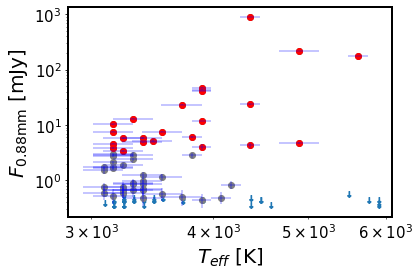

(None, None)

In [102]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

#avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

#manipulate trasnparency errobars
kwargs_errobar = {'alpha':0.3}

#create down pointing arrows
plt.scatter(arrows_temperature, arrows_fluxes, marker=r'$\downarrow$')

#errorbar for arrows
#plt.errorbar(arrows_temperature, arrows_fluxes, xerr=arrows_temperature_error_plot, ls='none')
plt.scatter(temperature_list_barenfeld, flux_barenfeld_0_88mm, c='gray')
plt.scatter(temperature_list_barenfeld_updated, matching_sources_flux, c='red')
plt.errorbar(temperature_list_barenfeld, flux_barenfeld_0_88mm, yerr=flux_barenfeld_0_88_error, ls='none', c='blue',
             **kwargs_errobar)
plt.errorbar(temperature_list_barenfeld, flux_barenfeld_0_88mm, xerr=temperature_error, ls='none', c='blue',
             **kwargs_errobar)
plt.ylabel(r'$F_{0.88\rm mm}$ [mJy]', fontsize=20), plt.xlabel(r'$T_{eff}\rm\ [K]$', fontsize=20)
plt.yscale('log'), plt.xscale('log')
ax.tick_params(which='both', labelsize=15)
plt.savefig('Fig 1 new'), plt.show()
